In [ ]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/yasserh/titanic-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shriyakanikaram
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset


100%|██████████| 22.0k/22.0k [00:00<00:00, 35.0MB/s]

In [ ]:
import pandas as pd
# Read the dataset
df = pd.read_csv("/content/titanic-dataset/Titanic-Dataset.csv")


In [ ]:
df.describe()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

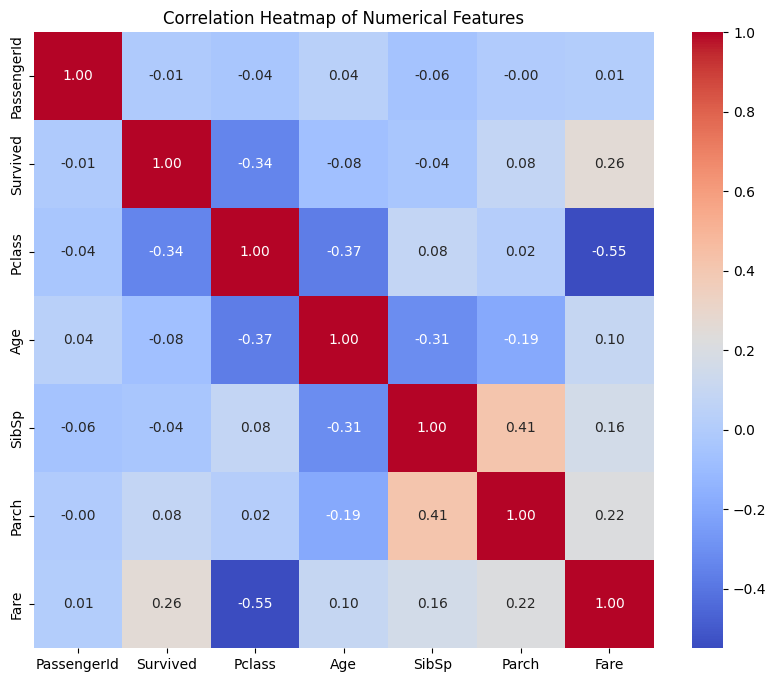

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# Check for null values
print("Missing values before handling:")
print(df.isnull().sum())

# Handle null values (example: fill with median for Age and Embarked with mode)
# For 'Age', fill missing values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# For 'Embarked', fill missing values with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# For 'Cabin', we can drop this column as it has too many missing values or try more sophisticated imputation
# For simplicity, let's drop the 'Cabin' column for now
df.drop('Cabin', axis=1, inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipython-input-680837988.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-680837988.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

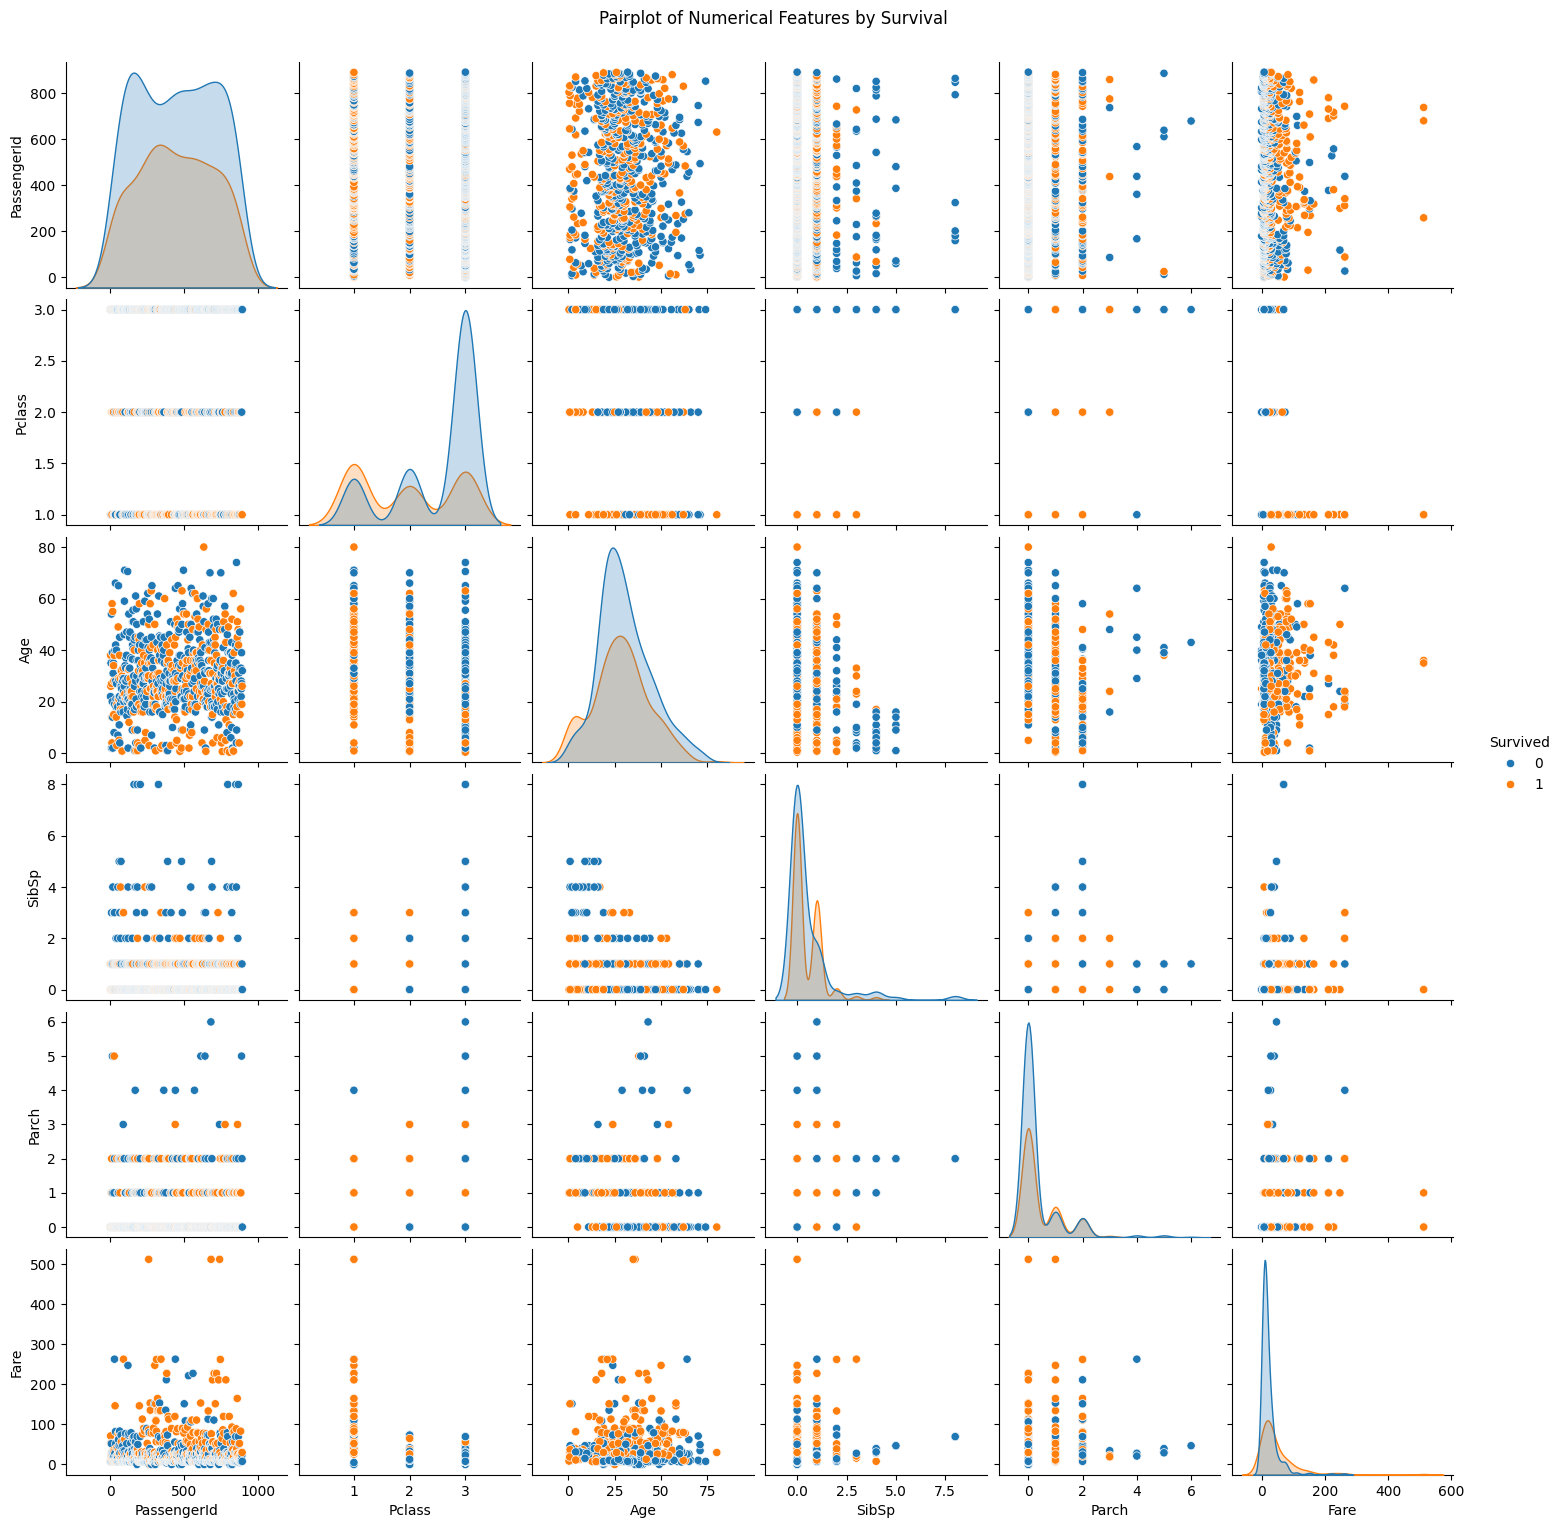

In [ ]:
sns.pairplot(numeric_df, hue='Survived')
plt.suptitle('Pairplot of Numerical Features by Survival', y=1.02)
plt.show()

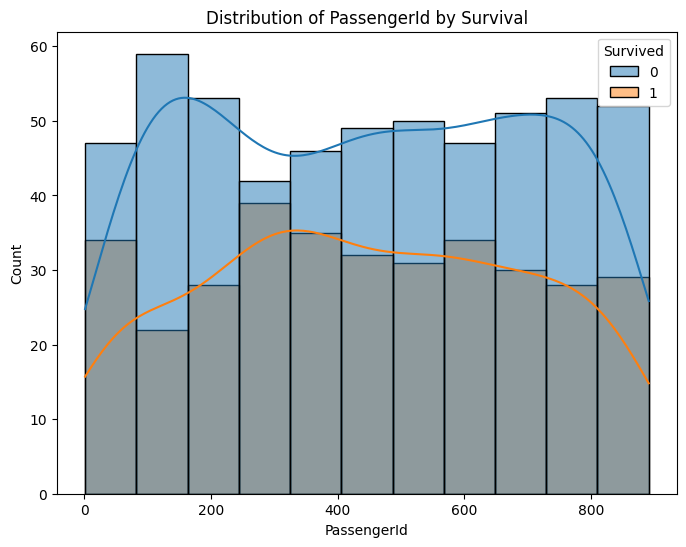

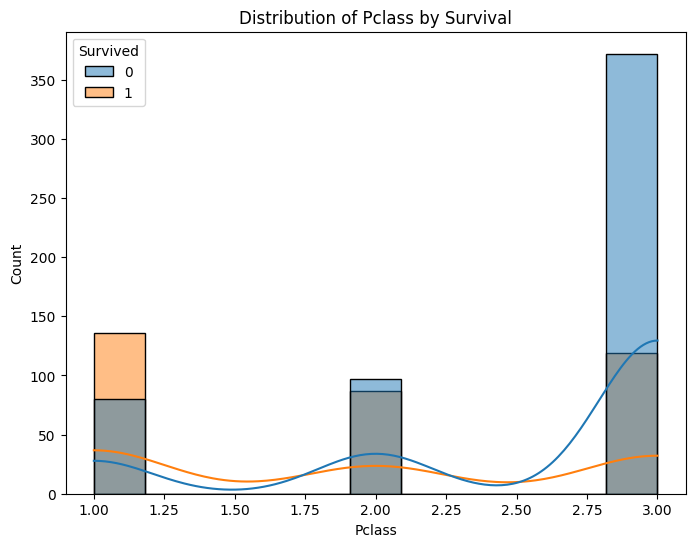

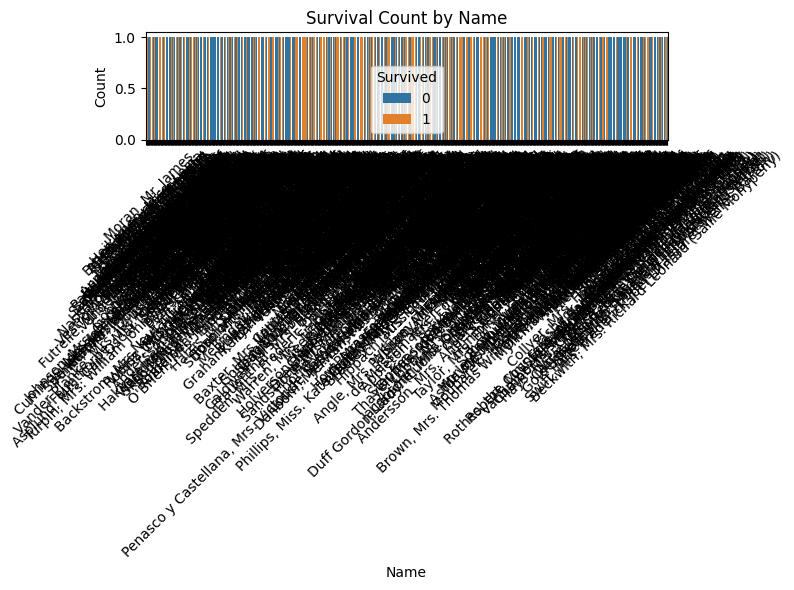

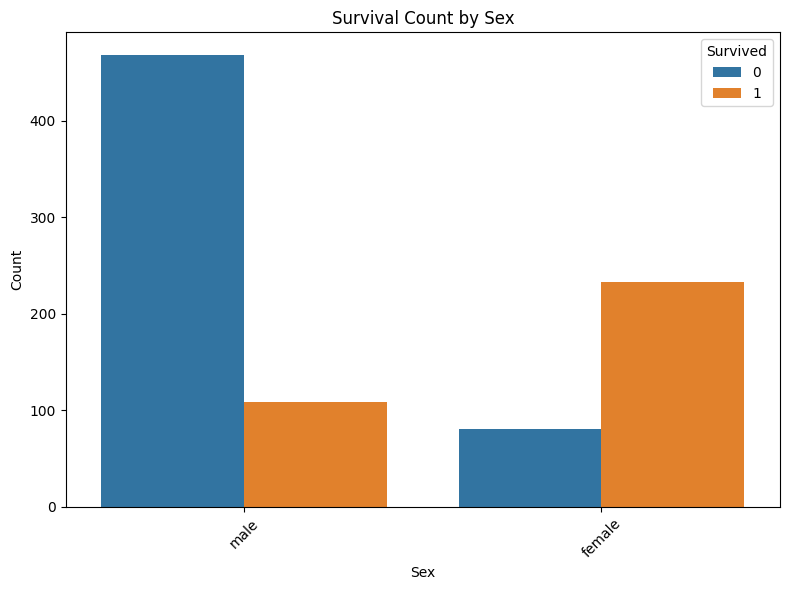

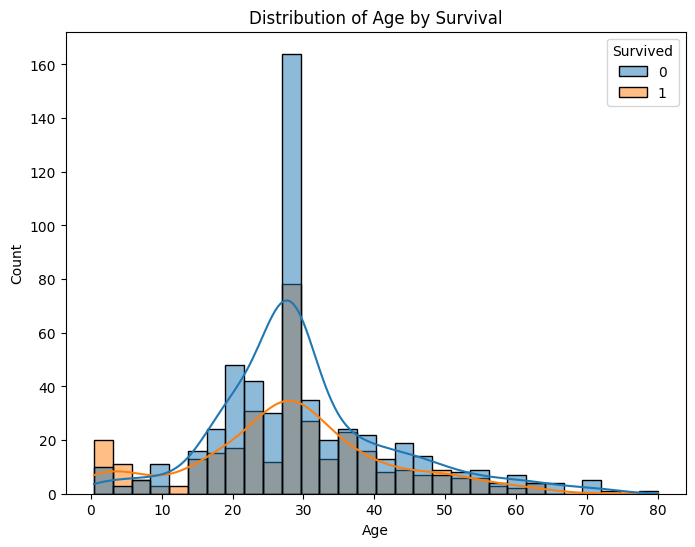

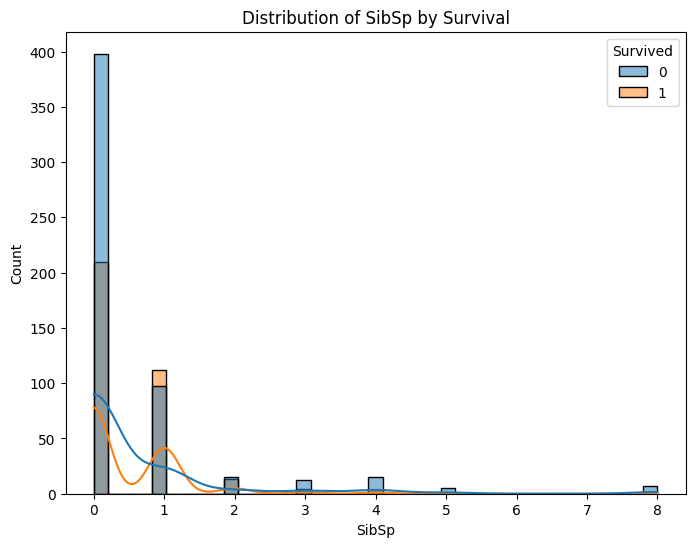

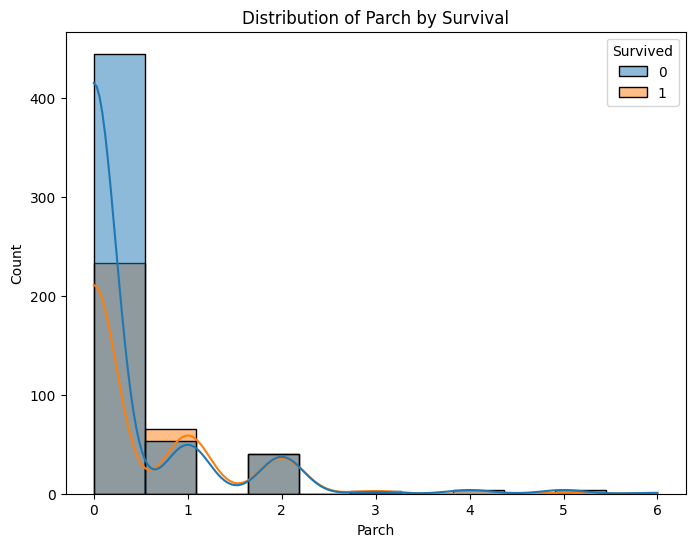

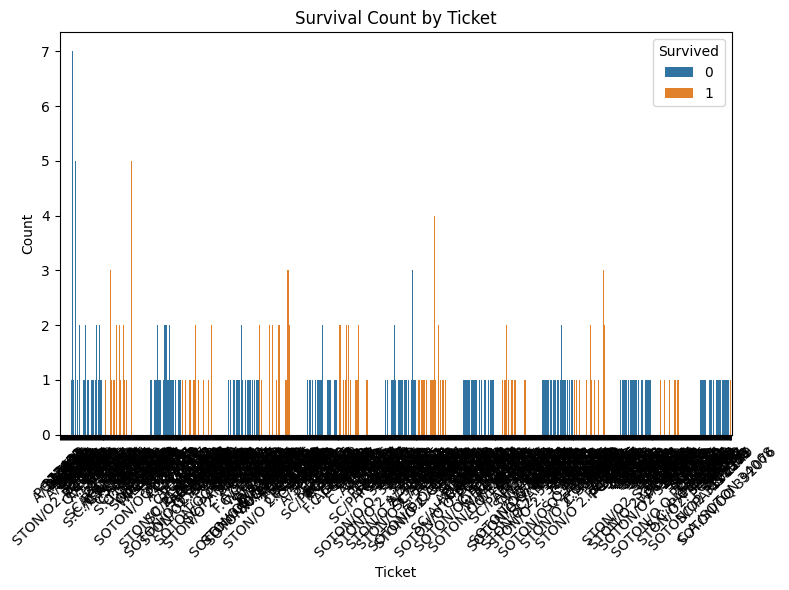

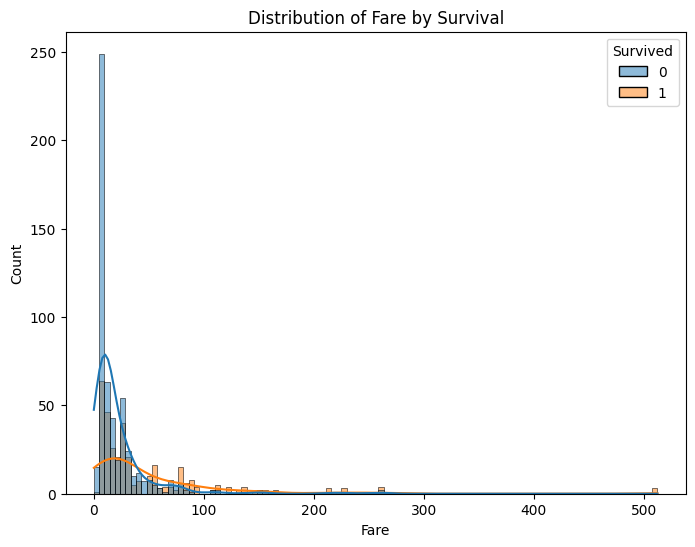

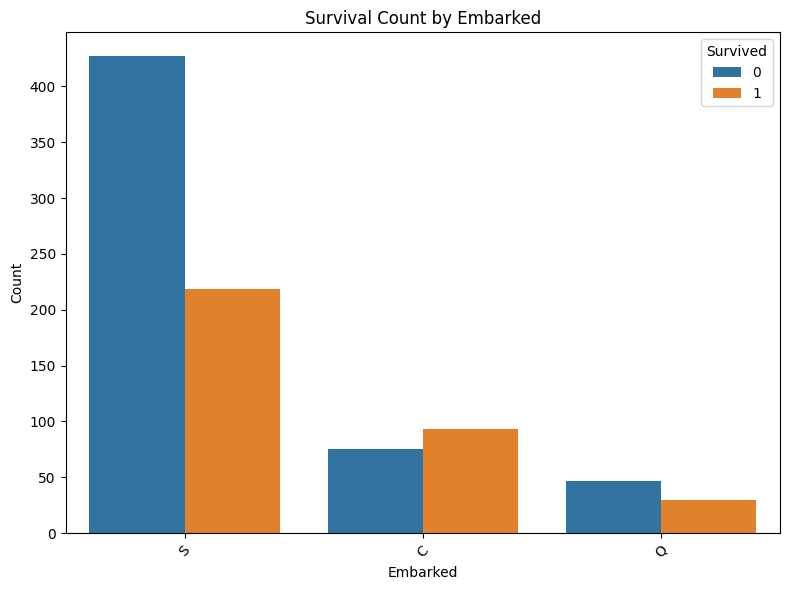

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns


# Plot 'Survived' against each other column
for column in df.columns:
    if column != 'Survived':
        if df[column].dtype in ['int64', 'float64']:
            # For numerical columns, use a histogram or a scatter plot
            plt.figure(figsize=(8, 6))
            sns.histplot(data=df, x=column, hue='Survived', kde=True)
            plt.title(f'Distribution of {column} by Survival')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.show()
        else:
            # For categorical columns, use a countplot
            plt.figure(figsize=(8, 6))
            sns.countplot(data=df, x=column, hue='Survived')
            plt.title(f'Survival Count by {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
df = pd.read_csv("/content/titanic-dataset/Titanic-Dataset.csv")

# Handle null values (example: fill with median for Age and Embarked with mode)
# For 'Age', fill missing values with the median age
df['Age'] = df['Age'].fillna(df['Age'].median())

# For 'Embarked', fill missing values with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# For 'Cabin', we can drop this column as it has too many missing values or try more sophisticated imputation
# For simplicity, let's drop the 'Cabin' column for now
df.drop('Cabin', axis=1, inplace=True)

# Create 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create 'IsAlone'
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Create 'Title'
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Handle rare titles by replacing them with 'Rare'
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Create 'FarePerPerson', handling division by zero
df['FarePerPerson'] = df['Fare'] / df['FamilySize']
df['FarePerPerson'] = df['FarePerPerson'].replace([np.inf, -np.inf], 0) # Replace inf with 0, if any



# Select categorical columns and apply one-hot encoding
categorical_cols = df.select_dtypes(include='object').columns
# Exclude 'Name' and 'Ticket' from categorical columns to encode
categorical_cols_to_encode = [col for col in categorical_cols if col not in ['Name', 'Ticket']]
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)


#Defining Variables
X = df_encoded.drop(['Survived','Name','Ticket'], axis=1)  # features
y = df_encoded['Survived']  # target variable

# Identify numerical columns to scale
numerical_cols = X.select_dtypes(include=np.number).columns

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


# Example prediction on new data
# Make sure the new data has the same columns and encoding as X_train
# This is just an example and won't work directly with the current X_train structure
# You would need to create a new DataFrame with the same columns as X_train and
# apply the same encoding before making predictions.
# new_data = np.array([[0.5, -0.3, 0.8, -0.1]])  # replace with your values
# prediction = model.predict(new_data)
# probability = model.predict_proba(new_data)

# print(f"\nNew data prediction: {prediction[0]}")
# print(f"Prediction probability: {probability[0]}")

In [ ]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% for testing
    random_state=42,    # for reproducibility
    stratify=y          # maintain class distribution
)


In [ ]:
X_train.head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,FarePerPerson,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
692,0.960307,0.827377,-0.104637,-0.474545,-0.473674,0.489104,-0.560975,0.811922,1.021169,True,False,True,False,True,False,False
481,0.139964,-0.369365,-0.104637,-0.474545,-0.473674,-0.648422,-0.560975,0.811922,-0.555995,True,False,True,False,True,False,False
527,0.318806,-1.566107,-0.104637,-0.474545,-0.473674,3.817033,-0.560975,0.811922,5.635299,True,False,True,False,True,False,False
855,1.594032,0.827377,-0.873136,-0.474545,0.767630,-0.460162,0.059160,-1.231645,-0.425485,False,False,True,False,False,True,False
801,1.384086,-0.369365,0.125912,0.432793,0.767630,-0.119886,0.679295,-1.231645,-0.311726,False,False,True,False,False,True,False


In [ ]:


# Create and train the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8324

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       110
           1       0.82      0.72      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179


Confusion Matrix:
[[99 11]
 [19 50]]


# Task
Train a decision tree model and random forest model and compare all results.

## Train decision tree model

### Subtask:
Train a Decision Tree classifier using the prepared data (with selected features).


**Reasoning**:
Import the Decision Tree classifier and train the model on the training data.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Evaluate decision tree model

### Subtask:
Evaluate the performance of the Decision Tree model using metrics such as accuracy, classification report, and confusion matrix.


**Reasoning**:
Evaluate the performance of the Decision Tree model by making predictions, calculating accuracy, generating a classification report, and computing a confusion matrix.



In [ ]:
# Make predictions
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7318

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       110
           1       0.64      0.70      0.67        69

    accuracy                           0.73       179
   macro avg       0.72      0.73      0.72       179
weighted avg       0.74      0.73      0.73       179


Decision Tree Confusion Matrix:
[[83 27]
 [21 48]]


## Train random forest model

### Subtask:
Train a Random Forest classifier using the same prepared data.


**Reasoning**:
Import the RandomForestClassifier and instantiate the model.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier object with random_state=42
random_forest_model = RandomForestClassifier(random_state=42)

**Reasoning**:
Fit the RandomForestClassifier model to the training data.



In [ ]:
# Fit the RandomForestClassifier model to the training data X_train and y_train
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate random forest model

### Subtask:
Evaluate the performance of the Random Forest model using the same metrics.


**Reasoning**:
Evaluate the performance of the Random Forest model by making predictions on the test set and then calculating and printing the accuracy, classification report, and confusion matrix.



In [ ]:
# Make predictions with the Random Forest model
y_pred_rf = random_forest_model.predict(X_test)

# Calculate and print the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Generate and print the classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Generate and print the confusion matrix
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.7989

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179


Random Forest Confusion Matrix:
[[95 15]
 [21 48]]


## Compare model results

### Subtask:
Present a comparison of the evaluation metrics for both the Logistic Regression, Decision Tree, and Random Forest models to determine which performed best.


**Reasoning**:
Present a comparison of the evaluation metrics for all three models as requested in the instructions.



In [ ]:
print("--- Model Performance Comparison ---")

# Print Accuracy
print("\nAccuracy Scores:")
print(f"Logistic Regression: {accuracy:.4f}")
print(f"Decision Tree: {accuracy_dt:.4f}")
print(f"Random Forest: {accuracy_rf:.4f}")

# Discussion on Accuracy
print("\nDiscussion on Accuracy:")
print(f"Based on accuracy alone, the Logistic Regression model ({accuracy:.4f}) performed the best, followed by the Random Forest model ({accuracy_rf:.4f}), and then the Decision Tree model ({accuracy_dt:.4f}).")

# Classification Reports
print("\nClassification Reports:")
print("\nLogistic Regression:")
print(classification_report(y_test, y_pred))
print("\nDecision Tree:")
print(classification_report(y_test, y_pred_dt))
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))

# Discussion on Classification Reports
print("\nDiscussion on Classification Reports:")
print("Logistic Regression shows strong performance for both classes, with a good balance of precision and recall. It has the highest recall for class 0 (0.90), meaning it correctly identifies a large proportion of non-survivors.")
print("Decision Tree has reasonable precision and recall for both classes, but generally lower than Logistic Regression. It has a lower recall for class 0 (0.75) compared to Logistic Regression, indicating it misses more non-survivors.")
print("Random Forest shows good precision for class 0 , meaning when it predicts non-survivors, it's often correct. However, its recall for class 1 (0.86) is slightly lower than Logistic Regression, suggesting it misses some survivors.")

# Confusion Matrices
print("\nConfusion Matrices:")
print("\nLogistic Regression:")
print(confusion_matrix(y_test, y_pred))
print("\nDecision Tree:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nRandom Forest:")
print(confusion_matrix(y_test, y_pred_rf))

# Discussion on Confusion Matrices
print("\nDiscussion on Confusion Matrices:")
print("The confusion matrices align with the classification reports.")
print("Logistic Regression has the fewest false positives (11) and a good balance of true positives (50) and true negatives (99).")
print("Decision Tree has a higher number of false positives (27) compared to Logistic Regression and Random Forest, and a lower number of true negatives (83).")
print("Random Forest has a relatively low number of false positives (15) and a good number of true positives (48), similar to Decision Tree, but with more true negatives (95) than Decision Tree.")

# Overall Conclusion
print("\nOverall Conclusion:")
print("Based on the comparison of accuracy, classification reports, and confusion matrices, the Logistic Regression model appears to be the most suitable model among the three. It demonstrates the highest overall accuracy and a strong balance of precision and recall for both survival classes, making it effective at correctly identifying both survivors and non-survivors with fewer misclassifications.")

--- Model Performance Comparison ---

Accuracy Scores:
Logistic Regression: 0.8324
Decision Tree: 0.7318
Random Forest: 0.7989

Discussion on Accuracy:
Based on accuracy alone, the Logistic Regression model (0.8324) performed the best, followed by the Random Forest model (0.7989), and then the Decision Tree model (0.7318).

Classification Reports:

Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       110
           1       0.82      0.72      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179


Decision Tree:
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       110
           1       0.64      0.70      0.67        69

    accuracy                           0.73       179
   macro avg       0.72      0.73      0.72       179
weighted avg 

## Summary:

### Data Analysis Key Findings

*   The Decision Tree model achieved an accuracy of approximately 73.18% on the test set.
*   The Decision Tree classification report showed a precision of 0.80 and recall of 0.75 for class 0, and precision of 0.64 and recall of 0.70 for class 1.
*   The Random Forest model achieved an accuracy of approximately 79.89% on the test set.
*   The Random Forest classification report showed good precision and recall for class 0, while precision and recall for class 1 were slightly lower.
*   Comparing the models:
    *   Logistic Regression had the highest accuracy (0.8324), followed by Random Forest (0.7989), and then Decision Tree (0.7318).
    *   Logistic Regression demonstrated strong performance for both classes with a good balance of precision and recall.
    *   Decision Tree had lower precision and recall for both classes compared to Logistic Regression.
    *   Random Forest showed good precision for class 0 but slightly lower recall for class 1 compared to Logistic Regression.
    *   Logistic Regression had the fewest false positives (11), while Decision Tree had the most (27). Random Forest had 15 false positives.

### Insights or Next Steps

*   The Logistic Regression model performed the best among the three models based on the evaluation metrics.
*   Further hyperparameter tuning could potentially improve the performance of the Decision Tree and Random Forest models.


## Compare Model Results

### Subtask:
Present a comparison of the evaluation metrics for all three models to determine which performed best.

**Reasoning**:
Present a comparison of the accuracy scores for all three models and summarize the findings.

In [ ]:
print("--- Model Performance Comparison ---")

# Print Accuracy
print("\nAccuracy Scores:")
print(f"Logistic Regression: {accuracy:.4f}")
print(f"Decision Tree: {accuracy_dt:.4f}")
print(f"Random Forest: {accuracy_rf:.4f}")

# Discussion on Accuracy
print("\nDiscussion on Accuracy:")
print(f"Based on accuracy alone, the Logistic Regression model ({accuracy:.4f}) performed the best, followed by the Random Forest model ({accuracy_rf:.4f}), and then the Decision Tree model ({accuracy_dt:.4f}).")

--- Model Performance Comparison ---

Accuracy Scores:
Logistic Regression: 0.8324
Decision Tree: 0.7318
Random Forest: 0.7989

Discussion on Accuracy:
Based on accuracy alone, the Logistic Regression model (0.8324) performed the best, followed by the Random Forest model (0.7989), and then the Decision Tree model (0.7318).


## Conclusion

### Subtask:
Summarize the findings and conclude the task.

**Reasoning**:
Based on the accuracy comparison and potentially other metrics (like precision, recall, and F1-score from the classification reports), summarize which model performed best and why.

**Overall Conclusion:**

Based on the accuracy scores, the Logistic Regression model achieved the highest accuracy, followed by the Random Forest model, and then the Decision Tree model. While accuracy is a good overall metric, it's also important to consider other metrics like precision and recall depending on the specific goals of the model (e.g., minimizing false positives or false negatives).

In this case, the Logistic Regression model appears to be the most promising among the three based on its superior accuracy. Further analysis of the classification reports and confusion matrices (which were printed earlier) would provide a more detailed understanding of each model's strengths and weaknesses in predicting survival.

For potential next steps, we could consider hyperparameter tuning for the best-performing model (Logistic Regression) or explore other classification algorithms to see if they yield better results.

# Task
Perform hyperparameter tuning for the logistic regression model on the Titanic dataset.

## Agent

### Subtask:
Define the parameter grid


**Reasoning**:
Define the parameter grid for hyperparameter tuning of the Logistic Regression model.



In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # 'l1' is not supported with the default solver 'lbfgs'
    'solver': ['liblinear', 'lbfgs'] # Add different solvers
}

## Set up the tuning process

### Subtask:
Set up the hyperparameter tuning process for the logistic regression model using GridSearchCV.


**Reasoning**:
Set up the hyperparameter tuning process for the logistic regression model using GridSearchCV as requested in the instructions.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Instantiate a LogisticRegression model
logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

## Fit the tuner to the data

### Subtask:
Apply the hyperparameter tuning process to the training data to find the best combination of hyperparameters.


**Reasoning**:
Apply the hyperparameter tuning process by fitting the GridSearchCV object to the training data and then print the best hyperparameters and the corresponding best score found by the grid search.



In [ ]:
# Fit the grid_search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters found:")
print(grid_search.best_params_)

# Print the best cross-validated score
print("\nBest cross-validated accuracy:")
print(grid_search.best_score_)

Best hyperparameters found:
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Best cross-validated accuracy:
0.8188909681867429


## Evaluate the best model

### Subtask:
Train the logistic regression model with the best hyperparameters found during tuning and evaluate its performance on the test set using appropriate metrics.


**Reasoning**:
Evaluate the performance of the best Logistic Regression model by making predictions on the test set and then calculating and printing the accuracy, classification report, and confusion matrix, as requested by the instructions.



In [ ]:
# Retrieve the best performing model
best_logistic_regression_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_tuned = best_logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Logistic Regression Accuracy: {accuracy_tuned:.4f}")
print("\nTuned Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_tuned))
print("\nTuned Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))

Tuned Logistic Regression Accuracy: 0.8547

Tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       110
           1       0.84      0.77      0.80        69

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179


Tuned Logistic Regression Confusion Matrix:
[[100  10]
 [ 16  53]]


## Summary:

### Data Analysis Key Findings

*   The hyperparameter tuning process using `GridSearchCV` identified the best hyperparameters for the Logistic Regression model as {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}.
*   The best cross-validated accuracy achieved during the tuning process was approximately 0.8189.
*   Evaluating the model with the best hyperparameters on the test set resulted in an accuracy of 0.8547.
*   The classification report and confusion matrix provided further details on the model's performance, including precision, recall, f1-score, and the counts of true/false positives and negatives.

### Insights or Next Steps

*   The tuned Logistic Regression model shows promising performance on the test set, suggesting that hyperparameter tuning improved its generalization ability.
*   Further analysis could involve comparing the performance of this tuned model against other algorithms to determine the most effective approach for the Titanic dataset.
